# 22111014

In [116]:
import pandas as pd
import inltk
import numpy as np
from inltk.inltk import tokenize
import heapq
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
import pickle

In [23]:
data = pd.read_csv('C:/Computational/1.txt',on_bad_lines='skip', sep='delimiter',header = None, encoding = 'utf-8')  #importing dataframe
# change path according to your file location.

In [24]:
data.head()

0
0       आवेदन करने की आखिरी तारीख 31 जनवरी, 2020 है।
1  इतनी दुआ कर दो हमारे लिए कि जितना प्यार दुनिया...
2  मोदी सरकार के पहले कार्यकाल में भी तीन तलाक को...
3  भाजपा के दिवंगत नेता प्रमोद महाजन की बेटी पूनम...
4  ऐसी स्थिति में एक न्यायपूर्ण सरकार सार्वजनिक व...

# Question1 Unicode_correction 

In [124]:
# ALL these List are prepared with the help of internet.
matras = set(['ऻ','ि','ी','ू','ृ','ॄ','ॅ','ॆ','े', 'ं', 'ै','ॉ','ॊ','ो','ौ','ॎ','ॏ','ु','ा'])
vyanjans = set(['क','ख','ग','घ','च','छ','ज','झ','ट','ठ','ड','ढ','ण','त','थ','द','ध','न','प','फ','ब','भ','म','य','र','ल','व','श','स','ष','ह','ष','त्र'])
dic = {'ऻ':'आ','ि':'इ','ी':'ई','ू':'ऊ','ृ':'ऋ','े':'ए', 'ं':'अं', 'ै':'ऐ','ो':'ओ','ौ':'औ','ु':'उ','ा':'आ','ॄ':'ऋ','ॅ':'ॲ ','ॆ':'ऐ','ॉ':'ऑ','ॊ':'ऒ','ॎ':'ए','ॏ':'औ'}
# Making dictionary to map matras with their swar sound.
swars = set(['अ','आ','इ','ई','उ','ऊ','ऋ','ए','ऐ','ओ','औ','अं','अः'])
punctuations = set(['>्','0्', '1्', '"्', 'ळ्', '2्', '–्', 'ः्', '3्', '5्', '4्', '््', '%्', '—्', '8्', '6्', '7्', '9्', 'ॅ्', 'a्', '>्', 'e्', '#्', 'i्','r्', 't्', '»्', 'o्', 'n्', 'd्', '०्', 's्', 'h्', 'l्', 'c्', 'm्',
'\u200c्', '\u200b्', 'ï्', 'A्', 'p्', '•्', 'b्', 'G्', 'B्', '&्', 'u्',
'_्', '@्', 'M्', 'о्', 'f्', '·्', '$्', 'S्', 'g्', 'I्', 'а्', 'е्', 'P्',
'и्', 'R्', 'y्', 'k्', 'w्', 'T्', '�्', 'a','b','c','d','e','f','g','h','i','j',
 'k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','0','1','2','3','4','5','6','7','8','9',
 'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
 '!','"','\\','#','\\','$','%','\\','&',"'",'\\','(','\\',')','\\','*','\\','+',',','\\','-','\\','.','/',
 ':',';','<','=','>','\\','?','@','\\','[','\\','\\','\\',']','\\','^','_','`','\\','{','\\','|','\\','}','\\','~'])# These are noise we just have to insure these does'nt occur and even if these occurs we just ignore them.

# We created set of the list to imporve the look_up time as in sets lookup time if of O(1).


In [31]:
def unicode(word):
    Corrected_word = ""
    l = len(word)
    for i in range(l):
        if word[i] in vyanjans:
            Corrected_word += ' ' +  word[i]+'्'
            if i <= l-2 and (word[i+1]=='्' or word[i+1] in punctuations) :   # IF this condition satisfied then we are doing nothing.
                pass
            elif i <= l-2 and (word[i+1] in vyanjans or word[i+1] in swars):
                Corrected_word += ' '+'अ'
            elif i <= l-2 and word[i+1] in matras:
                Corrected_word += ' '+ dic[word[i+1]]
            elif i == l - 1:
                Corrected_word += ' ' + 'अ'
        elif word[i] in swars:
            Corrected_word += ' '+ word[i]
    return Corrected_word

In [32]:
for i in 'अवनीश':   # code helpful for explanation of unicode function
    print(i)

print(unicode('अवनीश'))

अ
व
न
ी
श
 अ व् अ न् ई श् अ


# Question2 


# Don't run the below cell.

In [33]:
# white_seperated_words count
from collections import Counter
tokens = []
for i in data.iloc:
    for _ in i[0].split():
        if _ not in punctuations:
            if _[-1] in punctuations:           # to check for noise
                _ = _[:-1]             
            tokens.append(_)
    tokens.append('$') # to signify end of sentence.

# WE are importing tokens from pickle file that we have prepared beforehand.</br>
Run below code for tokens.

In [ ]:
# since the alogrithm takes so much time so, we stored a list of token and here i am reading that file.
import pickle
with open('tokens.pkl','rb') as f:
    tokens = pickle.load(f)
print(len(tokens))   # BPE tokens

In [7]:
# Instead of above two loop we have used list_comprehension to collect results because of faster execution.
# tokens = [_ if _[-1] not in punctuations else _[:-1] for i in data.iloc for _ in i[0].split() if _ not in punctuations]

In [7]:
from inltk.inltk import tokenize
print(data.iloc[1990][0])              # Different Ways to split
print(tokenize(data.iloc[-1][0] ,'hi'))   # we did'nt use inltk.tokenizer because of its slow execution.
print(data.iloc[1990][0].split())

खरीप व रब्बी हंगामात वेळेआधीच 3.70 लाख हेक्टर जमिनीत जोंधळा, मका, हरभरा, गहू, सूर्यफूल आदींची पेरणी झाली.
['▁सम', 'ि', '▁ति', '▁जो', '▁कि', '▁काफी', '▁लोक', 'प्र', 'ि', '▁य', '▁मानकर', '▁उ', 'म्', '▁मी', 'द', '▁जता', '▁रही', '▁थी', '▁कि']
['खरीप', 'व', 'रब्बी', 'हंगामात', 'वेळेआधीच', '3.70', 'लाख', 'हेक्टर', 'जमिनीत', 'जोंधळा,', 'मका,', 'हरभरा,', 'गहू,', 'सूर्यफूल', 'आदींची', 'पेरणी', 'झाली.']


In [69]:
token_dict = Counter(tokens)
freq_words_token = heapq.nlargest(len(token_dict.keys()), token_dict, key=token_dict.get) # to print tokens in decreasing order of their occurances
for i in freq_words_token:
    if i == '$':
        continue
    print(i,token_dict[i])    
# freq_words_token will contain all words in decreasing order of their frequency

के 373296
में 281781
की 228740
है 216328
को 171425
से 162381
और 135025
का 129465
ने 120627
पर 104754
कि 91006
हैं 79771
भी 75860
एक 58228
लिए 57874
इस 56047
नहीं 54878
कर 52756
ही 47780
किया 41225
हो 40543
तो 39614
यह 36406
करने 35091
कहा 34884
गया 33311
था 32016
साथ 29972
है. 29663
बाद 27289
अपने 24421
रहे 23810
दिया 23190
हुए 22484
तक 22277
रहा 21444
रही 20247
उन्होंने 19431
जा 19184
लेकिन 19160
जो 18662
सरकार 18528
थी 17911
वह 17804
गई 17786
कुछ 17134
पहले 16757
थे 16129
होने 16046
व 15902
लोगों 15468
कोई 15124
वाले 15112
अब 14900
करते 14752
या 14682
अपनी 14568
भारत 14330
इसके 14326
पुलिस 14072
आप 13981
गए 13813
किसी 13708
ये 13651
सिंह 13615
बात 13608
दी 13542
. 13422
हैं. 12750
साल 12429
तरह 12215
लेकर 12123
बताया 11970
कई 11911
जब 11885
उनके 11774
हुआ 11629
समय 11575
आज 11457
देश 11238
न 11005
द्वारा 10917
दिन 10802
दो 10801
हुई 10737
उन्हें 10381
काम 10364
सभी 10302
बार 10296
जाता 10203
इन 10020
फिर 9810
करना 9749
हम 9742
होता 9712
जाने 9639
बहुत 9409
लोग 9361
वे 9359
सकता 9297


In [71]:
# Character_count
from collections import Counter
# char_list = [j for i in tokens for j in unicode(i).split()]
char_list = []
for i in tokens:
    if i == '$':
        char_list.append('$')
        continue
    for j in unicode(i).split():   #unicode_correction of tokens and counting characters
        char_list.append(j)
char_dict = Counter(char_list)

In [72]:
len(char_list)#41708852

42066690

In [9]:
freq_words_char = heapq.nlargest(len(char_dict.keys()), char_dict, key=char_dict.get)
for i in freq_words_char:
    print(i,char_dict[i])

अ 8138935
आ 3480422
ए 2706042
क् 2614323
र् 2490692
ई 1696436
इ 1678913
न् 1571647
स् 1512483
ह् 1334582
म् 1240244
त् 1154210
ल् 1082619
ओ 1049568
प् 949058
य् 886365
व् 735393
द् 715616
उ 690300
ज् 648913
ब् 618262
ग् 563877
ऐ 514739
ट् 375603
श् 350059
च् 320902
भ् 271415
ड् 261277
ऊ 255492
अं 249222
थ् 215148
औ 214495
ख् 196566
ध् 190391
फ् 167293
ष् 147901
ण् 106768
छ् 72663
ठ् 51097
घ् 49805
ऑ 49657
ऋ 30801
ढ् 30206
झ् 27715
ॲ 614
ऒ 123


# SYllables

In [40]:
#syllable_count
def PurnaVyanjan(token,i):
    if  i < len(token) - 1:
        if token[i+1] in vyanjans:
            return token[i]
        elif token[i+1] in swars or token[i+1] in matras:
            return token[i:i+2]
        elif token[i+1] == '्':
            return token[i:i+2] + PurnaVyanjan(token,i+2)
    elif i >= len(token):
        return ""
    return token[i]

In [41]:
# please also execute above purnavyanjan function.
syllables_list = []
for token in tokens:
    i=0
    if token == '$':
        syllables_list.append('$')
        continue
    while i < len(token):
        if token[i] in vyanjans:
            string = PurnaVyanjan(token,i)
            syllables_list.append(string)
            i = i + len(string)-1
        elif token[i] in swars:
            syllables_list.append(token[i])
        i += 1

In [84]:
from collections import Counter
syllables_dict = Counter(syllables_list)
freq_words_syllables = heapq.nlargest(len(syllables_dict.keys()), syllables_dict, key = syllables_dict.get)
for i in freq_words_syllables:
    print(i,syllables_dict[i])

र 1179959
क 691669
न 581517
स 570975
के 477358
प 454220
ने 386481
ल 382288
त 363858
का 362067
$ 352378
है 350232
मे 344812
म 339387
ह 327861
ए 305124
अ 295385
ब 282871
की 277366
या 266665
से 252462
ज 251249
आ 240410
को 239374
कि 230724
ग 230719
व 228449
य 218801
इ 217576
द 205064
ना 197653
रा 190728
उ 188314
ता 180371
वा 169466
ही 158965
मा 154693
ला 154107
ले 149029
हा 147119
जा 145708
सा 145668
औ 139100
ड 134676
श 133857
री 128056
लि 127612
बा 127246
ट 126010
वि 119577
हो 115137
भी 104146
प्र 102456
दे 99551
दि 98576
ई 98231
नि 98057
च 95819
पा 95299
ते 91714
नी 89853
रि 88861
रे 88576
गा 86323
भा 82377
सी 79840
ती 79465
यो 78443
हु 76015
ख 74171
रो 72799
ति 71377
ली 69000
दा 68786
सं 68517
चा 65882
मि 65154
मु 60895
लो 59713
जि 58860
ण 57652
सि 54197
था 53417
दी 53391
तो 51821
हि 50981
थ 50750
फ 49752
शा 47538
हे 45444
ये 44523
पु 43857
जी 43810
ध 43592
ओ 41883
धा 41473
कु 40339
मं 40092
सु 39995
भ 39894
नो 38907
वे 37760
रू 37737
पी 37594
टी 37219
पू 37149
गे 36567
गी 36075
शि 3600

In [16]:
print(len(syllables_list))

20916903


# Bigram 

In [19]:
bi_dict = defaultdict(int)
for i in range(len(tokens)-1):
    if token[i] == '$' or token[i+1] == '$':  # to check that the last word of a sentence should not link with first word of next sentence.
        continue
    else:
        bi_dict[tokens[i]+" "+tokens[i+1]] += 1

freq_words = heapq.nlargest(1100, bi_dict, key=bi_dict.get)
for i in freq_words:
    print(i,bi_dict[i])

के लिए 50881
है कि 29575
के साथ 20277
कहा कि 18891
के बाद 17036
ने कहा 13702
है और 12689
करने के 10539
बताया कि 7608
को लेकर 7077
गया है। 6752
. . 6709
रहा है। 6565
उन्होंने कहा 6555
के खिलाफ 6277
के बीच 6122
के दौरान 6070
बारे में 6042
है तो 5945
हैं और 5714
करते हुए 5706
किया गया 5673
रहा है 5606
रहे हैं। 5551
कर रहे 5506
जा रहा 5483
में भी 5452
ने बताया 5429
रही है। 5379
में एक 5331
साथ ही 5175
करने की 5085
कर दिया 5019
था कि 4812
के बारे 4795
हैं कि 4794
के अनुसार 4698
लोगों को 4677
के कारण 4438
रहे हैं 4423
है जो 4377
रूप में 4328
गया है 4293
मामले में 4287
के पास 4215
है। इस 4214
को भी 4180
पुलिस ने 4095
होने के 4068
के रूप 4017
करने का 4014
रूप से 3980
जाता है 3932
की ओर 3832
सकता है। 3809
के मुताबिक 3806
की बात 3797
किया है। 3741
जा रही 3678
होता है 3655
है लेकिन 3638
जाता है। 3507
के तहत 3492
सरकार ने 3415
सकते हैं। 3361
इसके बाद 3294
की गई 3288
नहीं है 3278
कर सकते 3256
रही है 3215
नहीं है। 3211
गई है। 3166
कहना है 3159
किसी भी 3142
किया जा 3113
तौर पर 3111
वजह से 3103
से पहल

In [20]:
bi_dict = defaultdict(int)
for i in range(len(char_list)-1):
    if char_list[i] == '$' or char_list[i+1] == '$':  # to check that the last word of a sentence should not link with first word of next sentence.
        continue
    else:
        bi_dict[char_list[i]+" "+char_list[i+1]] += 1
    
freq_words = heapq.nlargest(1100, bi_dict, key=bi_dict.get)
for i in freq_words:
    print(i,bi_dict[i])


र् अ 1364775
अ क् 1133191
अ र् 1037589
क् अ 709807
अ न् 662056
अ ह् 656947
स् अ 604676
न् अ 598390
अ म् 557583
क् ए 480385
अ स् 479770
आ र् 475682
प् अ 469088
अ त् 421313
त् अ 410782
ए क् 394761
न् ए 387730
ल् अ 381113
म् अ 376351
क् आ 369623
अ ल् 359386
अ प् 353339
य् आ 350619
ह् ऐ 350484
म् ए 349584
ह् अ 327121
य् अ 323791
आ न् 304744
ब् अ 282804
क् ई 279295
ग् अ 269003
व् अ 266902
स् ए 255026
आ क् 254710
ज् अ 249408
अ व् 244046
अ द् 242729
क् ओ 240978
अ ब् 239240
क् इ 237020
र् आ 235660
आ ह् 234862
इ स् 232607
ए स् 223141
ई क् 219026
इ य् 217079
त् आ 214125
द् अ 213246
न् आ 202734
व् आ 197445
ओ क् 188835
आ ल् 188137
र् ई 181618
इ क् 181528
आ म् 174227
ट् अ 172549
म् आ 172520
अ य् 168152
आ स् 167547
ए ह् 164917
ल् आ 164011
ह् ई 160466
औ र् 159758
अ ग् 157886
ए ल् 156286
ल् ए 155974
आ त् 153040
आ ज् 152505
स् आ 151344
ह् आ 150962
अ ज् 150864
ज् आ 148876
श् अ 143618
ए प् 143360
ए म् 142693
प् र् 138540
ई ह् 137052
ह् ओ 136793
आ द् 136042
इ ल् 135563
आ प् 132638
ल् इ 132349
आ य् 129892


In [16]:
bi_dict = defaultdict(int)
for i in range(len(syllables_list)-1):
    if syllables_list[i] == '$' or syllables_list[i+1] == '$':  # to check that the last word of a sentence should not link with first word of next sentence.
        continue
    else:
        bi_dict[syllables_list[i]+" "+syllables_list[i+1]] += 1
freq_words = heapq.nlargest(1100, bi_dict, key=bi_dict.get)
for i in freq_words:
    print(i,bi_dict[i])

क र 190458
औ र 136111
प र 117800
इ स 97913
ए क 69325
लि ए 63915
न ही 59880
के लि 59351
अ प 52482
र ने 51987
त क 47934
का र 46841
कि या 44099
ता है 43887
ने के 42029
स के 41832
क हा 39818
र का 39797
न के 39174
य ह 37452
ते है 37042
स र 36443
है कि 36239
ग या 35995
र ह 34922
आ प 34248
उ न 34118
स क 32924
या है 32914
र के 32635
सा थ 32579
के बा 32551
बा द 32489
उ स 32237
स म 32152
त र 31767
दे श 30597
र त 30080
र क 29496
र हे 29354
प ह 29161
के सा 28967
प ने 28568
र प 28223
है इ 27023
र मे 26916
र को 26732
भा र 26649
ने क 26589
ती है 26295
र अ 26134
दि या 25402
न का 25195
वा र 24994
ह र 24890
र हा 24824
के अ 24762
र ही 24664
र आ 24470
ही है 24370
ने वा 24312
र ण 23800
ज न 23660
न की 23414
र स 22995
न क 22958
ने की 22958
हु ए 22821
इ न 22452
न मे 22265
र उ 21657
ह म 21481
न्हो ने 21385
प नी 20986
ब ता 20867
ग र 20844
कि न 20797
ल गा 20762
रा ज 20673
मा न 20663
ब ना 20629
जा र 20406
ले कि 20241
र र 20126
उ न्हो 20110
ज ब 19805
अ धि 19754
है औ 19698
जि स 19448
हा कि 19426
र से 19417
व ह 1931

# Question 3 BPE

We are using BPE on tokens directly that we got after split not on unicode corrected words because</br>
अवनीश - will be -> अ व् अ न् ई श् अ after unicode correction. And if run BPE on this we will get न् + ई as a token but we should be getting नी.

In [44]:
# Reference - sir's ppt , Internet_articles
import re
from collections import Counter, defaultdict
def build_vocab():
    token = []
    for _ in tokens:
        token.append(" ".join(_) + " </w>")  # This step will be useful for further Processing.
    return Counter(token)  


In [45]:
def bi_freq(vocab):
    pairs = defaultdict(int)
    for word, frequency in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-2):
            pairs[symbols[i],symbols[i+1]] += frequency
    return pairs    # returns most frequent adjacent characters.

In [46]:
def merge_vocab(pair,v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)  # updatation of keys of dict.
        v_out[w_out] = v_in[word]
    return v_out

In [11]:
# dont run this function this -will take so much time.

new_word = list()
vocab = build_vocab()
num_merges = 5000  # Hyperparameter
for i in range(num_merges):
    pairs = bi_freq(vocab)
    if not pairs:  # if no two continous character remained to merge to form new word
        break
    mx = max(pairs, key=pairs.get)
    new_word.append(mx[0]+mx[1])
    vocab = merge_vocab(mx, vocab)


In [48]:
# since the alogrithm takes so much time so, we stored a list of bpe_token and here i am reading that file.
import pickle
with open('bpe.pkl','rb') as f:
    new_word = pickle.load(f)
print(len(new_word))   # BPE tokens

5000


In [49]:
for i in new_word:
    print(i)

के
ार
ें
ने
्र
है
या
में
की
का
ों
कर
से
कि
को
ता
ना
स्
र्
ला
ही
क्
पर
वा
ले
रा
प्र
सा
मा
हा
और
लि
जा
्य
वि
हो
है।
इस
भी
कार
बा
दे
नि
दि
ते
हैं
नी
ति
ती
न्
गा
पा
ली
ड़
सी
हु
त्र
था
ंग
मि
हीं
री
त्
ल्
क्ष
एक
लिए
सं
जि
मु
दी
सि
दा
रह
नहीं
अप
भा
हि
यों
टी
रि
ोग
चा
जी
शा
वार
सम
ुर
तो
सर
्या
किया
ये
मे
मी
हैं।
देश
कु
कहा
पी
धि
पू
यह
ंड
वे
द्
शि
रे
गया
रो
खा
बी
करने
ट्र
ंद
न्ह
उन
ार्
आप
साथ
बाद
सु
उस
ष्
वी
ारी
राज
मं
धा
बि
है.
उन्ह
गी
पु
श्
फि
नों
हम
क्र
जो
पह
ित
तक
स्ट
दो
रहे
तर
थी
भार
गे
सक
लोग
20
मै
ंच
मान
अन
डि
रू
दिया
अपने
बार
प्
चु
वर्
हर
जन
म्
च्
ओं
इन
बे
मो
शन
हुए
यो
रहा
त्री
सरकार
टे
ढ़
जब
टा
पि
टर
किन
ोंने
रही
बता
थे
बर
दू
वह
बना
गई
जे
लेकिन
उन्होंने
मिल
लो
अधि
टि
ग्र
जिस
गर
स्था
चार
..
खि
लगा
रु
परि
मंत्री
सू
हां
सब
सो
आई
कुछ
बै
बात
चि
ंध
यु
लग
पहले
जाए
अब
पे
प्रति
होने
सिं
डी
दर्
यर
वाले
मौ
स्त
एस
स्थ
मुख
श्र
योग
ध्य
भारत
दु
लोगों
लिस
लों
कर्
कोई
क्षा
ची
डा
चे
ंक
था।
ियों
सिंह
पुलिस
गु
करते
कार्य
मार
अपनी
व्य
द्र
पूर्
फी
निर्
पो
201
गए
हे
अनु
वर
इसके
धान
ब्
छा
उप
कै
ड़ा
गा।
पुर
ड़


# Working of merge_vocab Function explanation

In [27]:
# demo of merge_vocab Function
def merge_vocab(pair,demo_in):
    demo_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in demo_in:
        w_out = p.sub(''.join(pair), word)
        demo_out[w_out] = demo_in[word]
    return demo_out
pair = ('a','v')
demo_in = {}
demo_in["a v n i s h"] = 6
print(demo_in)
demo_in = merge_vocab(pair,demo_in)
print(demo_in)
pair = ('av','n')
demo_in = merge_vocab(pair,demo_in)
print(demo_in)

{'a v n i s h': 6}
{'av n i s h': 6}
{'avn i s h': 6}


# 3 (b)

We are taking Vocabulary of size 5K as it will contain all the words that will be generated by bPE algorithm for vocab size - 1K , 2K ,3K , 4k , 5k. 

In [51]:
bpe_token_dict = Counter(new_word)
freq_token_bpe = heapq.nlargest(len(bpe_token_dict.keys()), bpe_token_dict, key = bpe_token_dict.get)  # freq_bpe_token_dict stores the bpe_token in decreasing order of their frequency.
for i in freq_token_bpe:
    print(i,bpe_token_dict[i])

के 1
ार 1
ें 1
ने 1
्र 1
है 1
या 1
में 1
की 1
का 1
ों 1
कर 1
से 1
कि 1
को 1
ता 1
ना 1
स् 1
र् 1
ला 1
ही 1
क् 1
पर 1
वा 1
ले 1
रा 1
प्र 1
सा 1
मा 1
हा 1
और 1
लि 1
जा 1
्य 1
वि 1
हो 1
है। 1
इस 1
भी 1
कार 1
बा 1
दे 1
नि 1
दि 1
ते 1
हैं 1
नी 1
ति 1
ती 1
न् 1
गा 1
पा 1
ली 1
ड़ 1
सी 1
हु 1
त्र 1
था 1
ंग 1
मि 1
हीं 1
री 1
त् 1
ल् 1
क्ष 1
एक 1
लिए 1
सं 1
जि 1
मु 1
दी 1
सि 1
दा 1
रह 1
नहीं 1
अप 1
भा 1
हि 1
यों 1
टी 1
रि 1
ोग 1
चा 1
जी 1
शा 1
वार 1
सम 1
ुर 1
तो 1
सर 1
्या 1
किया 1
ये 1
मे 1
मी 1
हैं। 1
देश 1
कु 1
कहा 1
पी 1
धि 1
पू 1
यह 1
ंड 1
वे 1
द् 1
शि 1
रे 1
गया 1
रो 1
खा 1
बी 1
करने 1
ट्र 1
ंद 1
न्ह 1
उन 1
ार् 1
आप 1
साथ 1
बाद 1
सु 1
उस 1
ष् 1
वी 1
ारी 1
राज 1
मं 1
धा 1
बि 1
है. 1
उन्ह 1
गी 1
पु 1
श् 1
फि 1
नों 1
हम 1
क्र 1
जो 1
पह 1
ित 1
तक 1
स्ट 1
दो 1
रहे 1
तर 1
थी 1
भार 1
गे 1
सक 1
लोग 1
20 1
मै 1
ंच 1
मान 1
अन 1
डि 1
रू 1
दिया 1
अपने 1
बार 1
प् 1
चु 1
वर् 1
हर 1
जन 1
म् 1
च् 1
ओं 1
इन 1
बे 1
मो 1
शन 1
हुए 1
यो 1
रहा 1
त्री 1
सरकार 1
टे 1
ढ़ 1
जब 1
टा 1
पि 1
टर 1
किन 1
ोंने 1
रही 1
बता

In [111]:
# character of the words find by BPE
# Character_count
char_list_bpe = []
for i in new_word:
    for j in unicode(i).split():   #unicode_correction of tokens and counting characters.Unicode(i) will return corrected word.
        char_list_bpe.append(j)      
char_dict_bpe = Counter(char_list_bpe)
freq_char_bpe = heapq.nlargest(len(char_dict_bpe.keys()), char_dict_bpe, key = char_dict_bpe.get)  # freq_chars_bpe will store the character with decreasing order of their frequency.
for i in freq_char_bpe:
    print(i,char_dict_bpe[i])

अ 4604
आ 1930
र् 1396
इ 1024
क् 838
न् 832
स् 814
ए 805
त् 757
ई 728
ल् 640
म् 636
य् 537
प् 522
व् 469
ओ 437
द् 431
उ 409
ह् 397
ज् 383
ब् 355
ग् 343
ट् 302
श् 264
च् 224
ड् 193
अं 193
ऊ 179
ध् 153
ख् 141
ष् 123
भ् 112
फ् 111
ऐ 104
ण् 96
थ् 92
औ 59
ऑ 43
छ् 41
ठ् 36
घ् 36
ऋ 34
ढ् 26
झ् 21


In [42]:
# BPE token's syllables
syllables_list_bpe = []
for token in new_word:
    i=0
    while i < len(token):
        if token[i] in vyanjans:
            string = PurnaVyanjan(token,i)   # calling purnavyanjan function.
            syllables_list_bpe.append(string)
            i = i + len(string)-1
        elif token[i] in swars:
            syllables_list_bpe.append(token[i])
        i += 1
syllables_dict_bpe = Counter(syllables_list_bpe)

In [112]:
freq_syllable_bpe = heapq.nlargest(len(syllables_dict_bpe.keys()), syllables_dict_bpe, key = syllables_dict_bpe.get) # freq_syllables_bpe will store the syllables with decreasing order of their frequency.
for i in freq_syllable_bpe:
    print(i,syllables_dict_bpe[i])

र 441
न 324
क 317
स 284
ल 266
त 225
म 215
प 195
ज 175
अ 170
ह 160
ब 153
य 145
का 138
ग 138
द 136
आ 135
व 132
रा 126
मा 110
ना 109
वा 109
इ 107
ट 107
ने 105
या 103
ड 103
ता 102
नि 96
ला 94
ए 94
श 94
उ 94
वि 93
री 91
सा 75
रि 67
प्र 63
हा 62
जा 60
सं 60
ति 59
यो 59
बा 58
रे 57
च 55
ले 54
ख 54
ण 54
नी 53
ई 53
गा 52
पा 50
रो 50
चा 49
दा 48
कि 47
मि 46
मु 46
सी 45
र् 44
मे 43
दि 43
के 42
ती 42
दे 41
लि 40
हि 40
ली 39
जि 39
सि 39
ध 38
से 36
शा 35
को 34
ते 32
भा 32
धा 31
भ 30
दी 29
शि 29
ही 28
की 27
क्ष 27
लो 27
धि 26
सु 26
नो 26
गे 26
हो 25
गी 25
फ 25
जी 24
हु 23
त्र 23
पी 23
डि 23
ढ 23
ष 23
वे 22
पू 21
खा 21
बि 20
पु 20
ओ 20
रु 20
टी 19
मी 19
थ 19
मं 19
पि 19
यु 19
फा 19
बं 18
ये 17
टा 17
जे 17
बी 16
हे 16
रू 16
टे 16
टि 16
चि 16
गु 16
स् 15
खि 15
क्त 15
फि 14
दो 14
बे 14
मो 14
सू 14
सो 14
स्त 14
चे 14
ठ 14
ल् 13
चु 13
दू 13
छ 13
पे 13
डी 13
ची 13
डा 13
र्य 13
खे 13
स्ता 13
बु 13
तु 13
घ 13
तं 13
है 12
न् 12
त् 12
स्था 12
नु 12
यू 12
प्रा 12
शु 12
श् 11
ध्य 11
दु 11
गो 11
शी 11
र्ट 11
गि 11

# Bi Grams of Tokens,characters,syllables of bpe words

In [55]:
bi_dict = defaultdict(int)
for i in range(len(new_word)-1):
    bi_dict[new_word[i]+" "+new_word[i+1]] += 1                     # Here we are not checking condition of end of sentence as we did above because
freq_words = heapq.nlargest(1100, bi_dict, key=bi_dict.get)     # here new_word are generated from bpe are splited from sentences.
for i in freq_words:
    print(i,bi_dict[i])

के ार 1
ार ें 1
ें ने 1
ने ्र 1
्र है 1
है या 1
या में 1
में की 1
की का 1
का ों 1
ों कर 1
कर से 1
से कि 1
कि को 1
को ता 1
ता ना 1
ना स् 1
स् र् 1
र् ला 1
ला ही 1
ही क् 1
क् पर 1
पर वा 1
वा ले 1
ले रा 1
रा प्र 1
प्र सा 1
सा मा 1
मा हा 1
हा और 1
और लि 1
लि जा 1
जा ्य 1
्य वि 1
वि हो 1
हो है। 1
है। इस 1
इस भी 1
भी कार 1
कार बा 1
बा दे 1
दे नि 1
नि दि 1
दि ते 1
ते हैं 1
हैं नी 1
नी ति 1
ति ती 1
ती न् 1
न् गा 1
गा पा 1
पा ली 1
ली ड़ 1
ड़ सी 1
सी हु 1
हु त्र 1
त्र था 1
था ंग 1
ंग मि 1
मि हीं 1
हीं री 1
री त् 1
त् ल् 1
ल् क्ष 1
क्ष एक 1
एक लिए 1
लिए सं 1
सं जि 1
जि मु 1
मु दी 1
दी सि 1
सि दा 1
दा रह 1
रह नहीं 1
नहीं अप 1
अप भा 1
भा हि 1
हि यों 1
यों टी 1
टी रि 1
रि ोग 1
ोग चा 1
चा जी 1
जी शा 1
शा वार 1
वार सम 1
सम ुर 1
ुर तो 1
तो सर 1
सर ्या 1
्या किया 1
किया ये 1
ये मे 1
मे मी 1
मी हैं। 1
हैं। देश 1
देश कु 1
कु कहा 1
कहा पी 1
पी धि 1
धि पू 1
पू यह 1
यह ंड 1
ंड वे 1
वे द् 1
द् शि 1
शि रे 1
रे गया 1
गया रो 1
रो खा 1
खा बी 1
बी करने 1
करने ट्र 1
ट्र ंद 1
ंद न्ह 1
न्ह उन 1
उन ार् 1
ार् आप 1
आप स

In [56]:
bi_dict = defaultdict(int)
for i in range(len(char_list_bpe)-1):
    bi_dict[char_list_bpe[i]+" "+ char_list_bpe[i+1]] += 1
    
freq_words = heapq.nlargest(1100, bi_dict, key=bi_dict.get)
for i in freq_words:
    print(i,bi_dict[i])

र् अ 589
अ र् 543
अ न् 363
अ क् 352
न् अ 339
क् अ 332
अ स् 312
स् अ 306
अ म् 305
आ र् 277
त् अ 269
ल् अ 268
अ त् 266
अ ल् 253
म् अ 240
य् अ 221
अ ह् 211
प् अ 207
अ प् 197
आ न् 187
अ व् 183
अ ब् 175
ज् अ 170
र् आ 168
ह् अ 164
व् अ 161
अ द् 159
य् आ 158
ब् अ 152
ग् अ 146
क् आ 145
ट् अ 143
द् अ 142
अ ज् 141
त् आ 138
इ क् 128
र् ई 127
म् आ 123
व् आ 121
अ ग् 121
न् आ 117
इ य् 114
आ स् 109
आ ल् 108
न् ए 105
ल् आ 104
व् इ 102
श् अ 101
प् र् 98
इ त् 98
न् इ 96
आ य् 94
आ त् 91
र् इ 90
अ च् 89
अ य् 89
आ म् 87
इ स् 87
अ अ 86
र् ए 85
आ व् 83
आ क् 81
स् आ 79
इ ल् 79
आ ज् 78
त् इ 77
आ प् 76
अ ट् 74
आ ह् 73
आ द् 73
अ श् 73
य् ओ 71
ए स् 69
ह् आ 67
ड् अ 67
र् ओ 66
ई स् 65
च् अ 65
ए क् 64
ल् ए 63
ज् आ 63
इ र् 63
अ ख् 63
ण् अ 63
आ ग् 62
अ ड् 61
स् अं 60
ए श् 60
ब् आ 58
अ ण् 58
प् आ 57
इ न् 56
अ आ 56
त् र् 55
ष् अ 55
अ भ् 54
न् ई 54
ई क् 52
ग् आ 52
च् आ 52
ख् अ 52
अ ध् 51
क् इ 50
क् ष् 50
आ ब् 50
ई प् 50
त् ई 49
ई न् 49
द् आ 49
म् ए 48
म् इ 48
ध् अ 47
स् ई 46
म् उ 46
द् ए 45
उ र् 45
क् ए 44
उ न् 44
ल् इ 4

In [57]:
bi_dict = defaultdict(int)
for i in range(len(syllables_list_bpe)-1):
    bi_dict[syllables_list_bpe[i]+" "+syllables_list_bpe[i+1]] += 1
    
freq_words = heapq.nlargest(1100, bi_dict, key=bi_dict.get)
for i in freq_words:
    print(i,bi_dict[i])

क र 36
स म 18
र ण 18
मा न 17
वा र 16
न अ 16
य र 16
त र 15
ट र 15
ल ग 14
र वि 14
का र 13
ब र 13
न क 13
ह न 12
ह म 12
त क 12
श न 12
क रे 12
ग ल 12
इ स 11
रा ज 11
ज न 11
इ न 11
ल गा 11
प रि 11
जा ए 11
उ प 11
न का 11
नि क 11
र ब 11
ब ढ 11
र वा 10
दे श 10
ह त 10
र ज 10
मि ल 10
आ ई 10
धा न 10
प हु 10
स मा 10
का उ 10
प र 9
र ह 9
र स 9
स र 9
उ न 9
उ स 9
प ह 9
ब ना 9
अ धि 9
क म 9
ल य 9
न स 9
न र 9
धि का 9
द न 9
प ड 9
ल न 9
इ ट 9
प्र ति 8
ए स 8
मा र 8
व न 8
य न 8
स द 8
य म 8
स ल 8
य ल 8
ल क 8
ला इ 8
ल ने 8
नि य 8
न ल 8
न त 8
र ने 7
आ प 7
र हे 7
ह र 7
जि स 7
चा र 7
यो ग 7
का र्य 7
व र 7
म क 7
लि या 7
ए म 7
क ह 7
रा न 7
र ख 7
र क 7
क ता 7
स स 7
बं ध 7
न ज 7
ज र 7
क रा 7
ब द 7
म हा 7
ध न 7
न व 7
य क 7
वि धा 7
ज वा 7
क्ष ण 7
न प 7
अ भि 7
ल ब 7
त अ 7
रि क 7
ति क 7
नी ति 6
दा र 6
अ प 6
स क 6
बा र 6
ब ता 6
ग र 6
र त 6
र अ 6
अ नु 6
म ह 6
र म 6
म हि 6
रा म 6
र मा 6
आ रो 6
नि या 6
या स 6
ज ग 6
अ ग 6
ज य 6
ट ना 6
पा ल 6
व स 6
ग त 6
स ह 6
ल मा 6
प क 6
र ल 6
न इ 6
त ब 6
वा प 6
त री 6
इ त 6
स का 6
प रे 6
क प 

# Question4)-
Precision = TruePositives / (TruePositives + FalsePositives) </br>
Recall = TruePositives / (TruePositives + FalseNegatives) </br>
F-Measure = (2 * Precision * Recall) / (Precision + Recall)

# vocab_Size = 1k

In [67]:
True_Positive = False_Positive = 0
Ground_truth = set(tokens) # creating Set to boost look_up time.
for _ in range(1000):
    if new_word[_] in Ground_truth:
        True_Positive += 1
    else:
        # print(new_word[_]) to check what are the wrong words generated by BPE.
        False_Positive += 1
False_negative = len(Ground_truth) - True_Positive 

Precision = True_Positive / (True_Positive + False_Positive) 
Recall = True_Positive / (True_Positive + False_negative) 
F_Measure = (2 * Precision * Recall) / (Precision + Recall)
print("precision->",Precision,"Recall->",Recall,"F_Measure->",F_Measure)
print("Number of wrong Words Generated by BPE for Vocab_size-1000 are->",False_Positive)

precision-> 0.836 Recall-> 0.002428375979992041 F_Measure-> 0.004842685141471864
Number of wrong Words Generated by BPE for Vocab_size-1000 are-> 164


# vocak_size = 2k

In [68]:
True_Positive = False_Positive = 0
Ground_truth = set(tokens)
for _ in range(2000):
    if new_word[_] in Ground_truth:
        True_Positive += 1
    else:
        #print(new_word[_])  to check what are the wrong words generated by BPE.
        False_Positive += 1
False_negative = len(Ground_truth) - True_Positive 

Precision = True_Positive / (True_Positive + False_Positive) 
Recall = True_Positive / (True_Positive + False_negative) 
F_Measure = (2 * Precision * Recall) / (Precision + Recall)

print("precision->",Precision,"Recall->",Recall,"F_Measure->",F_Measure)
print("Number of wrong Words Generated by BPE for Vocab_size-2000 are->",False_Positive)

precision-> 0.8155 Recall-> 0.004737656965750022 F_Measure-> 0.009420584931107279
Number of wrong Words Generated by BPE for Vocab_size-2000 are-> 369


# vocab_size = 5k

In [66]:
True_Positive = False_Positive = 0
Ground_truth = set(tokens)
for _ in range(5000):
    if new_word[_] in Ground_truth:
        True_Positive += 1
    else:
        #print(new_word[_])  to check what are the wrong words generated by BPE.
        False_Positive += 1
False_negative = len(Ground_truth) - True_Positive 

Precision = True_Positive / (True_Positive + False_Positive) 
Recall = True_Positive / (True_Positive + False_negative) 
F_Measure = (2 * Precision * Recall) / (Precision + Recall)

print("precision->",Precision,"Recall->",Recall,"F_Measure->",F_Measure)
print("Number of wrong Words Generated by BPE for Vocab_size-5000 are->",False_Positive)

precision-> 0.803 Recall-> 0.011662595167067039 F_Measure-> 0.02299127018894071
Number of wrong Words Generated by BPE for Vocab_size-5000 are-> 985


# Question5- Lemma File

In [97]:
import conllu
with open('C:/Users/pc/Desktop/UD_Hindi-HDTB-master/hi_hdtb-ud-dev.conllu', mode="r", encoding="utf-8") as data:
    
    annotations = data.read()
# Use the parse() function to parse the annotations; store under 'sentences'
sentences = conllu.parse(annotations)
list_of_lemma = []
list_of_surface_form = []
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        x = sentences[i][j]['lemma']
        y = sentences[i][j]['form']
        list_of_lemma.append(x)
        list_of_surface_form.append(y)

with open('C:/Users/pc/Desktop/UD_Hindi-HDTB-master/hi_hdtb-ud-train.conllu', mode="r", encoding="utf-8") as data:
    
    # Read the file contents and assign under 'annotations'
    annotations = data.read()
# Use the parse() function to parse the annotations; store under 'sentences'
sentences = conllu.parse(annotations)
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        x = sentences[i][j]['lemma']
        y = sentences[i][j]['form']
        list_of_lemma.append(x)
        list_of_surface_form.append(y)

with open('C:/Users/pc/Desktop/UD_Hindi-HDTB-master/hi_hdtb-ud-test.conllu', mode="r", encoding="utf-8") as data:
    
    # Read the file contents and assign under 'annotations'
    annotations = data.read()
# Use the parse() function to parse the annotations; store under 'sentences'
sentences = conllu.parse(annotations)
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        x = sentences[i][j]['lemma']
        y = sentences[i][j]['form']
        list_of_lemma.append(x)
        list_of_surface_form.append(y)  

sentences[9][9]

35217
316274
351704


{'id': 10,
 'form': 'का',
 'lemma': 'का',
 'upos': 'ADP',
 'xpos': 'PSP',
 'feats': {'AdpType': 'Post',
  'Case': 'Nom',
  'Gender': 'Masc',
  'Number': 'Sing'},
 'head': 9,
 'deprel': 'case',
 'deps': None,
 'misc': {'ChunkId': 'NP4', 'ChunkType': 'child', 'Translit': 'kā'}}

In [98]:
#Making Dict of Lemmas
from collections import Counter
Lemma_dict = Counter(list_of_lemma)

# Question6 </br>
 Zifian_distributuion</br>
 Reference - http://www.lel.ed.ac.uk/~jim/zipfjrh.pdf
 

Text(0.5, 1.0, 'Top 100 tokens')

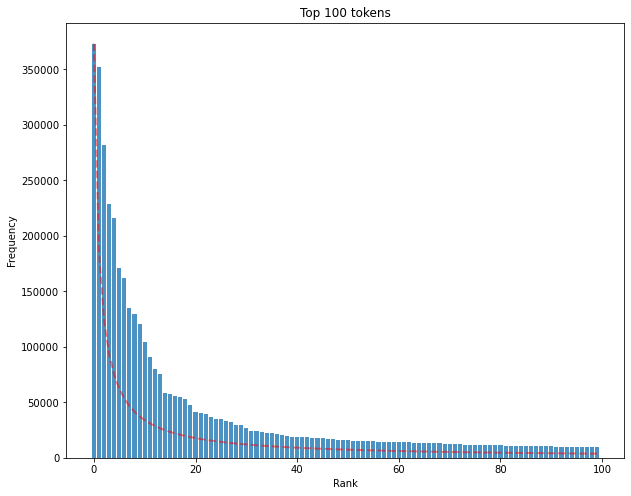

In [91]:
# distribution of white-space seperated words
freq_words = heapq.nlargest(100, token_dict.keys(), key=token_dict.get)
frequency = [token_dict[i] for i in freq_words]  
    
y_pos = np.arange(100)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf = [frequency[0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, frequency, align='center', alpha=0.8)
plt.plot(expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 100 tokens')

Text(0.5, 1.0, 'Top 40 characters')

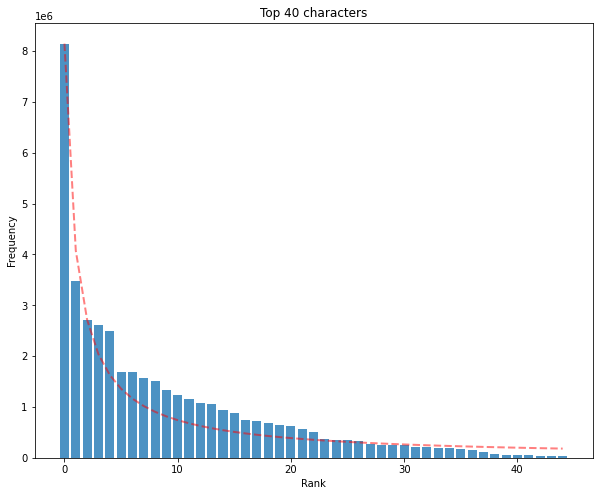

In [89]:
# Distribution of characters
freq_words = heapq.nlargest(45, char_dict.keys(), key=char_dict.get)
frequency = [char_dict[i] for i in freq_words]
y_pos = np.arange(45)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf = [frequency[0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, frequency, align='center', alpha=0.8)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 40 characters')

1179959


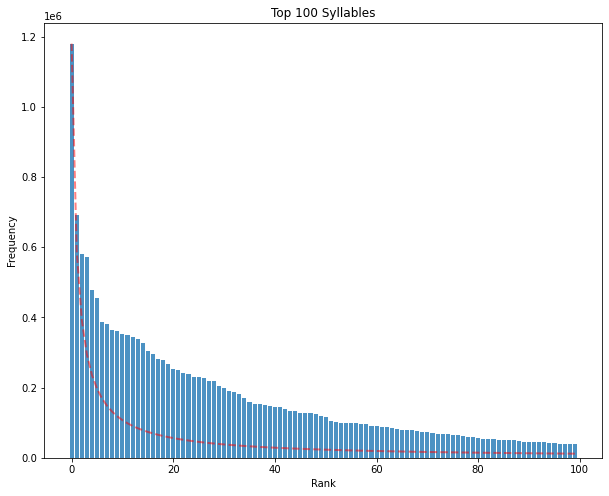

In [86]:
# Distribution of Syllables
freq_words = heapq.nlargest(100,syllables_dict.keys(), key=syllables_dict.get)
frequency = [syllables_dict[i] for i in freq_words]
y_pos = np.arange(100)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf = [frequency[0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, frequency, align='center', alpha=0.8)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 100 Syllables')
print(frequency[0])

20953


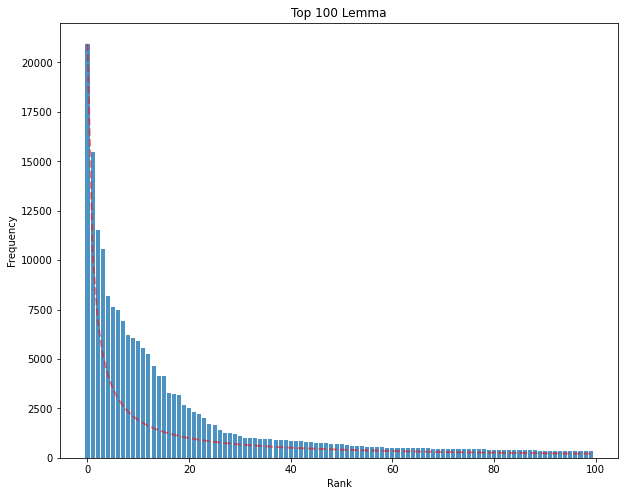

In [37]:
# Distribution of Lemmas
freq_words = heapq.nlargest(100,Lemma_dict, key=Lemma_dict.get)
frequency = [Lemma_dict[i] for i in freq_words]
y_pos = np.arange(100)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf = [frequency[0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, frequency, align='center', alpha=0.8)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 100 Lemmas')
print(frequency[0])

1


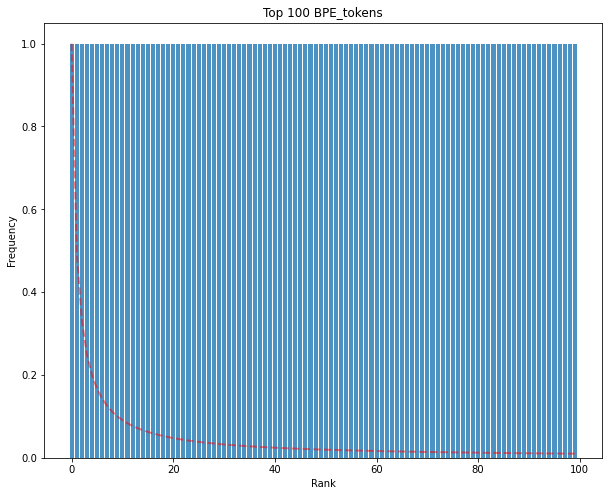

In [113]:
# zifian for BPE words (vocab = 5k , as it will be a superset of all other voacb size)
freq_words = heapq.nlargest(100,bpe_token_dict, key=bpe_token_dict.get)
frequency = [bpe_token_dict[i] for i in freq_words]
y_pos = np.arange(100)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf = [frequency[0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, frequency, align='center', alpha=0.8)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 100 BPE_tokens')
print(frequency[0])

In [87]:
# Reason for above ziffian law failure-
# From the implementation of BPE, almost with each iteration we get unique word. so, for every word frequency is will be 1 -
for key,value in bpe_token_dict.items():
    print(key,value)

के 1
ार 1
ें 1
ने 1
्र 1
है 1
या 1
में 1
की 1
का 1
ों 1
कर 1
से 1
कि 1
को 1
ता 1
स् 1
ना 1
र् 1
ला 1
ही 1
क् 1
वा 1
पर 1
ले 1
रा 1
प्र 1
सा 1
मा 1
और 1
हा 1
लि 1
जा 1
्य 1
वि 1
हो 1
है। 1
इस 1
भी 1
कार 1
बा 1
दे 1
दि 1
नि 1
ते 1
हैं 1
नी 1
ति 1
ती 1
न् 1
गा 1
ली 1
पा 1
ड़ 1
त्र 1
हु 1
सी 1
था 1
ंग 1
मि 1
हीं 1
री 1
क्ष 1
त् 1
ल् 1
एक 1
लिए 1
सं 1
मु 1
जि 1
दी 1
सि 1
दा 1
रह 1
नहीं 1
अप 1
भा 1
हि 1
टी 1
रि 1
यों 1
चा 1
ोग 1
शा 1
जी 1
वार 1
सम 1
ुर 1
तो 1
सर 1
्या 1
किया 1
ये 1
मे 1
मी 1
हैं। 1
देश 1
कु 1
कहा 1
धि 1
पी 1
पू 1
ंड 1
वे 1
यह 1
शि 1
द् 1
रे 1
गया 1
करने 1
रो 1
बी 1
खा 1
ट्र 1
न्ह 1
उन 1
ंद 1
साथ 1
ार् 1
आप 1
बाद 1
सु 1
ष् 1
उस 1
मं 1
ारी 1
राज 1
धा 1
वी 1
ित 1
है. 1
उन्ह 1
श् 1
गी 1
पु 1
फि 1
नों 1
हम 1
बि 1
पह 1
तक 1
स्ट 1
क्र 1
जो 1
दो 1
तर 1
थी 1
भार 1
रहे 1
गे 1
20 1
सक 1
लोग 1
मान 1
मै 1
ंच 1
दिया 1
डि 1
बार 1
अन 1
रू 1
अपने 1
प् 1
चु 1
वर् 1
हर 1
म् 1
च् 1
जन 1
मो 1
ओं 1
बे 1
शन 1
इन 1
हुए 1
मंत्र 1
यो 1
सरकार 1
रहा 1
ढ़ 1
टे 1
जब 1
टा 1
ोंने 1
टर 1
किन 1
पि 1
रही 1
थे

Text(0.5, 1.0, 'Top 40 characters')

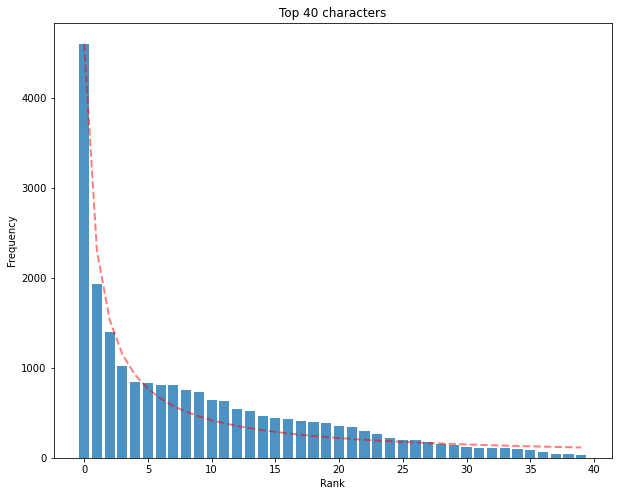

In [94]:
# Distribution of BPE_characters
freq_words = heapq.nlargest(40, char_dict_bpe.keys(), key=char_dict_bpe.get)
frequency = [char_dict_bpe[i] for i in freq_words]
y_pos = np.arange(40)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf = [frequency[0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, frequency, align='center', alpha=0.8)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 40 characters')

Text(0.5, 1.0, 'Top 40 BPE_syllables')

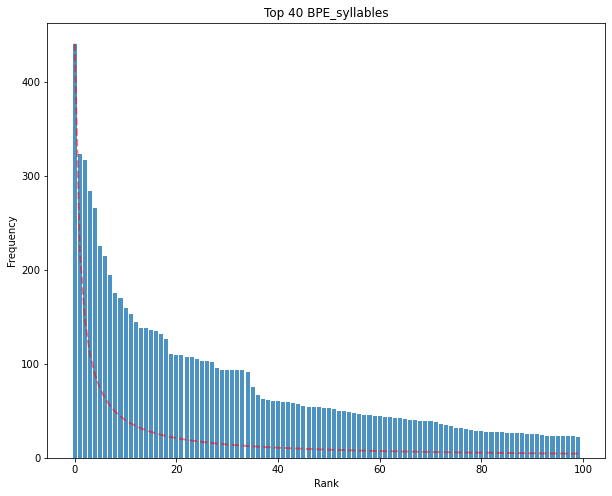

In [114]:
# Distribution of BPE_syllables
freq_words = heapq.nlargest(100, syllables_dict_bpe.keys(), key=syllables_dict_bpe.get)
frequency = [syllables_dict_bpe[i] for i in freq_words]
y_pos = np.arange(100)
plt.figure(figsize=(10,8))
s = 1
# expceted_zipf show list of expected frequency.....
expected_zipf = [frequency[0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, frequency, align='center', alpha=0.8)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 100 BPE_syllables')

# Question7 -

In [119]:
lemma_set = set(list_of_lemma)  # making a set for faster look_up
suffixes = []

In [120]:
for i in list_of_surface_form:
    if i in lemma_set:
        continue
    for _ in range(1,len(i)):
        if i[:-_] in lemma_set:
            suffixes.append(i[-_:])
            break

In [121]:
# Working of above Code
s = 'avnish'
for i in [s]:
    if i == 'av': #suppose lemma to be 'av'
        continue
    for _ in range(1,len(i)):
        if i[:-_] == 'av':
            print("our suffix will be->",i[-_:])
            break

our suffix will be-> nish


In [122]:
suffixes_dict = Counter(suffixes)
# 50 most frequent suffixes-
freq_words = heapq.nlargest(50, suffixes_dict, key=suffixes_dict.get)
for i in freq_words:
    print(i,suffixes_dict[i])

े 6760
ों 6583
ा 3963
ने 3747
या 3289
ी 2957
्होंने 1527
ते 1478
के 1348
ए 1336
ियों 978
ता 973
ओं 965
ना 839
ती 632
कर 597
्हें 541
की 534
मले 499
ें 489
नों 436
ई 422
एगा 389
से 376
का 357
में 337
ेंगे 335
गा 319
ेगा 291
ं 270
गी 231
ले 225
ेगी 217
एगी 205
एं 197
यों 192
़ 135
नी 120
ो 112
एंगे 111
रे 108
गे 91
्चों 82
ंगे 78
्स 77
ौते 74
ियां 73
र 70
मलों 69
ीं 63


b) Correct Suffixes

In [132]:
Correct__es = set(['नी','वाला','लु','इया','दार','हार','आऊ','आई', 'औटी', 'अना', 'ओड़ा', 'ता', 'ओड़', 'वन','औती','ना','ई','य','त'])
right_suffixes = []
for _ in suffixes:
    if _ in Correct__es:
        right_suffixes.append(_)